In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
# Set random seed
np.random.seed(42)

# Number of customers
n_customers = 10000

# Generate synthetic data
ages = np.random.randint(18, 70, size=n_customers)
income = np.random.normal(loc=50, scale=20, size=n_customers).clip(10, 150)  # Annual income in '000s
spending_score = np.random.normal(loc=50, scale=25, size=n_customers).clip(1, 100)

# Build DataFrame
df = pd.DataFrame({
    'CustomerID': range(1, n_customers + 1),
    'Age': ages,
    'Annual_Income_k': income.round(2),
    'Spending_Score': spending_score.round(2)
})

print(df.head())


   CustomerID  Age  Annual_Income_k  Spending_Score
0           1   56            32.95           72.22
1           2   69            59.51           58.83
2           3   46            62.65           64.99
3           4   32            40.52           81.79
4           5   60            34.56           46.25


In [5]:
X = df[['Annual_Income_k', 'Spending_Score']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


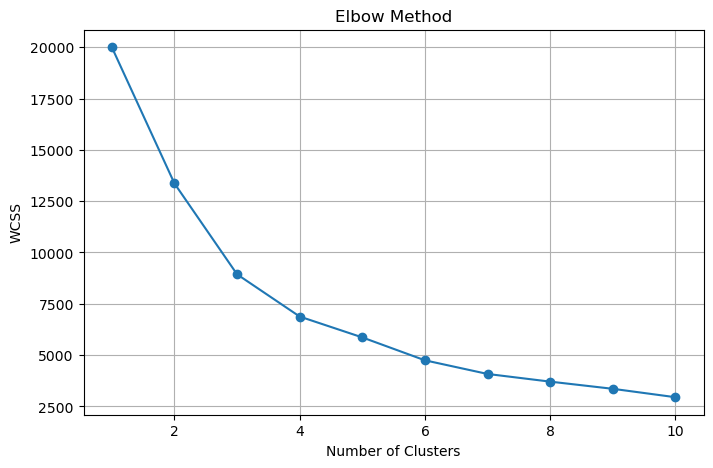

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


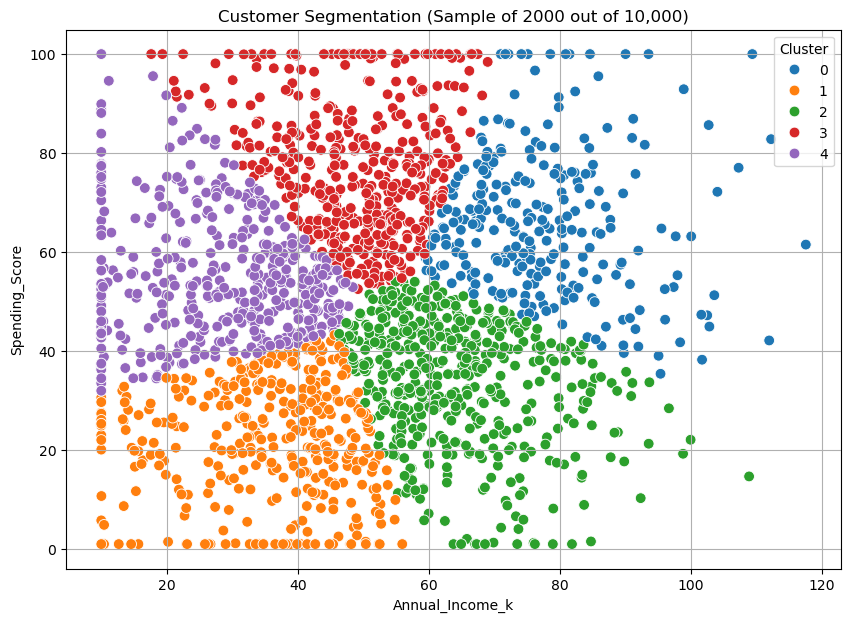

In [11]:
# Sample data to plot
sample_df = df.sample(2000)

plt.figure(figsize=(10, 7))
sns.scatterplot(data=sample_df, x='Annual_Income_k', y='Spending_Score', hue='Cluster', palette='tab10', s=60)
plt.title("Customer Segmentation (Sample of 2000 out of 10,000)")
plt.grid(True)
plt.show()


In [13]:
df.to_csv("large_customer_segmentation.csv", index=False)
